## 지출 목적별 소비자 물가 지수
##### 19년도 1월 부터 22년 6월까지 항목별 소비자 물가 지수
##### 그 중 교통, 통신, 오락, 교육, 음식 및 숙박, 기타 상품 및 서비스에 대해서 조사

In [1]:
import pandas as pd

In [2]:
price_Data = pd.read_excel('./Data/지출목적별_소비자물가지수_품목포함__2020100__20220720090824.xls', index_col = 1).drop('시도별',axis = 1).T
price_Data = price_Data.rename(columns = {'07 교통':'교통', '08 통신':'통신', '09 오락 및 문화':'오락', '10 교육' : '교육',
                                         '11 음식 및 숙박' : '음식 숙박', '12 기타 상품 및 서비스': '기타 상품 및 서비스'})
price_Data.index = pd.period_range('2019-01-01','2022-06-30',freq = 'm')

In [3]:
price_Data

지출목적별,교통,통신,오락,교육,음식 숙박,기타 상품 및 서비스
2019-01,98.899,103.283,100.468,102.456,98.699,97.357
2019-02,98.699,102.390,101.319,102.563,98.870,97.664
2019-03,99.289,102.127,100.587,102.602,98.636,97.836
2019-04,100.769,102.411,101.615,102.660,98.789,98.052
2019-05,103.049,102.201,101.200,102.748,98.978,98.395
2019-06,103.299,102.043,100.181,102.797,99.068,98.152
2019-07,102.569,101.613,101.685,102.797,99.284,98.224
2019-08,102.579,102.001,102.515,102.826,99.545,98.188
2019-09,102.979,102.285,101.418,101.031,99.050,98.188
2019-10,103.589,102.211,101.774,101.168,99.212,98.260


##### 코로나 확진자 수 자료

In [4]:
covid19 = pd.read_excel('./Data/코로나바이러스감염증-19_확진환자_발생현황.xlsx', skiprows=4).drop(0)
covid19 = covid19.iloc[:,[0,1]].rename(columns = {'계(명)': '확진자 수'})
covid19['일자'] = pd.to_datetime(covid19['일자'])
covid19.set_index('일자', inplace = True)
covid19 = covid19.to_period('m')
covid19 = covid19.reset_index().groupby('일자').sum()
covid19 = covid19.drop('2022-07')

##### 원유 가격 변동 자료

In [5]:
oilPrice = pd.read_csv('./Data/원유가격현황.csv')
oilPrice = oilPrice[['날짜', '종가']]
oilPrice['날짜'] = pd.to_datetime(oilPrice['날짜'], format = '%Y년 %m월 %d일')
oilPrice = oilPrice.set_index('날짜').to_period('m').reset_index().groupby('날짜').mean()
oilPrice.columns = ['원유 종가']

##### 한국 금리변동 자료

In [6]:
interestRate = pd.read_csv('./Data/국제 주요국 중앙은행 정책금리_19141249.csv', encoding = 'euc-kr', index_col = 1).iloc[:,3:].T
ys = ['2019']*12 +['2020']*12 +['2021']*12 + ['2022']*6
interestRate.index = [ys[i] +' '+ interestRate.index[i] for i in range(len(ys))]
interestRate.index = pd.to_datetime(interestRate.index, format = '%Y %b-%d')
interestRate = interestRate.to_period('m')[['한국']]
interestRate.columns = ['한국 금리']
interestRate = interestRate.fillna(2.25)

##### 자료 통합 및 정규화

In [7]:
df_total = pd.concat([price_Data, covid19, oilPrice, interestRate], axis = 1, ).fillna(0)
def get_range(s):
    return [s.max(), s.min(), s.max() - s.min()]
df_total.apply(get_range)

import numpy as np
df_total = df_total.copy()
df_total['확진자 수'] = df_total['확진자 수'].apply(lambda x : np.log10(x+1))

def min_max_scal(x):
    return((x-x.min())/(x.max()-x.min()))

df_total_01 = df_total.apply(min_max_scal)

##### 시각화

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from datetime import datetime
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

## 종목이 다양하기 때문에 우선은 상관계수가 높은 종목을 구분

### 각 요소 간의 상관관계 분석

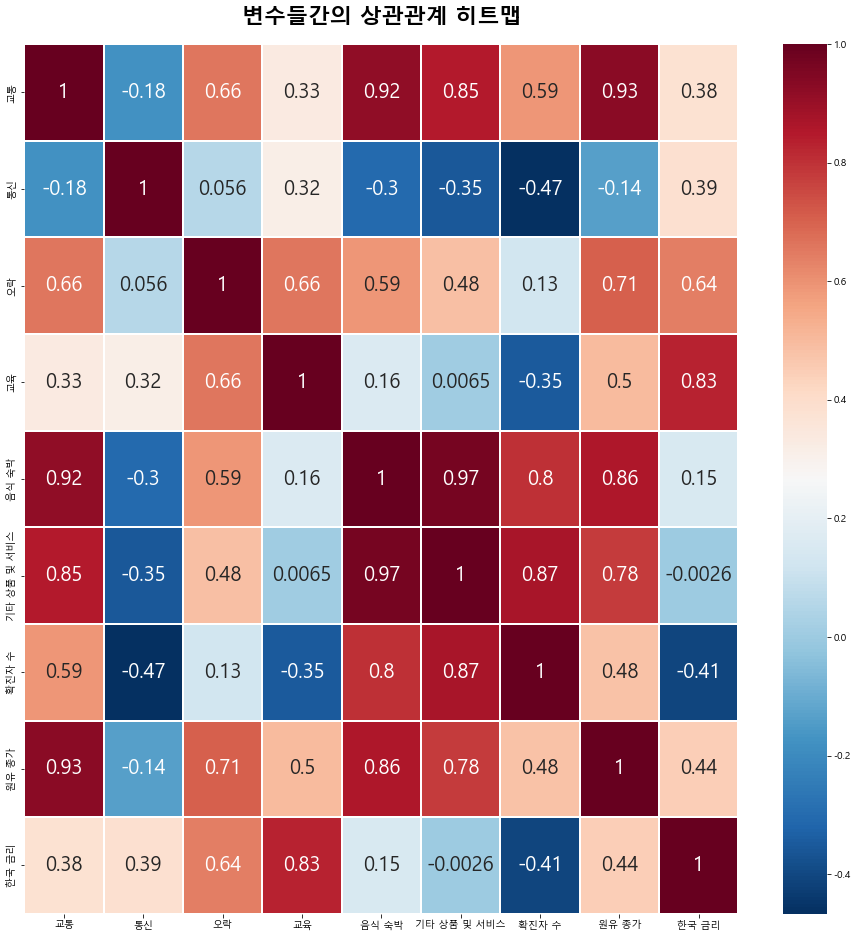

In [9]:
plt.figure(figsize=(16,16))
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_total_01.corr(), annot= True, cmap='RdBu_r', annot_kws={'size':20}, linewidth = 2)
plt.title('변수들간의 상관관계 히트맵', pad = 20, position=(0.5, -5), fontdict={'fontsize': 22, 'fontweight': 'bold'})
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

#### 상관관계를 분석해본 결과
#### 통신 비용은 확진자 수, 원유 종가, 한국 금리 모든 변수와 상관계수가 0.5가 넘지 않는 것을 알 수 있습니다.
#### 통신비용의 경우 우편료나 휴대전화비 등 한번 정해지면 변동폭이 크지 않은 비용들이라 상관관계가 약한 것으로 보입니다.
#### 통신을 제외한 다른 종목들을 그래프로 그려 분석해보겠습니다

In [19]:
colors = sns.color_palette('tab10', 10)
lf_cols = list(df_total_01.columns[:6])
fac_cols = list(df_total_01.columns[6:])

def draw_scaled(df_total_01, col = ' ', time = ' '):
    print('\n\n')
    plt.figure(figsize=(16,6))
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)
    plt.bar(range(len(df_total_01.index)), df_total_01[col], alpha = 0.5, color = colors[0])
    plt.xticks(range(len(df_total_01.index)), df_total_01.index, rotation=80)
    for fac in fac_cols:
        plt.plot(range(len(df_total_01.index)),df_total_01[fac],
                 linestyle = '--', marker = 's', color = colors[fac_cols.index(fac)+1])
    legs = list(df_total_01.columns[6:]) +[col] 

    plt.legend(legs,loc = 2)
    
    # 각 시기별로 구간 표시
    if time == '코로나 확산 초기':
        plt.axvspan(11, 15, facecolor='orange', alpha=0.3)
        plt.text(x=16.5, y = 0.93, s = '코로나 확산 초기 ', fontsize = 14, color = 'black', ha = 'right' )
    elif time == '우-러 전쟁 반발':
        plt.axvline(x=37, ymin=0, ymax=1.0, color = 'black', alpha = 0.5)
        plt.text(x=36, y = 0.93, s = '우-러 전쟁 발발 ', fontsize = 14, color = 'black', ha = 'right' )
        plt.axhline(y=0.425, xmin=0, xmax=1.0, color = 'red', alpha = 0.5, linestyle='--')
        plt.text(x=8, y = 0.5, s = '코로나 이전 원유 종가 및 금리', fontsize = 14, color = 'r',  ha = 'right' )
        plt.axvspan(37, 41, facecolor='red', alpha=0.3)
    elif time == '최근':
        plt.axvspan(38, 41, facecolor='red', alpha=0.3)
        plt.text(x=43.5, y = 0.2, s = '최근', fontsize = 14, color = 'black', ha = 'right' )
    
    plt.title(f'{col}과(와) 변수들간의 {time} 그래프', pad = 20, position=(0.5, -5), fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.show()
    print('\n\n')

In [20]:
def showgraph(var= ' '):
    for col in lf_cols:
        if col == '통신':
            continue
        else:
            draw_scaled(df_total_01, col, var)

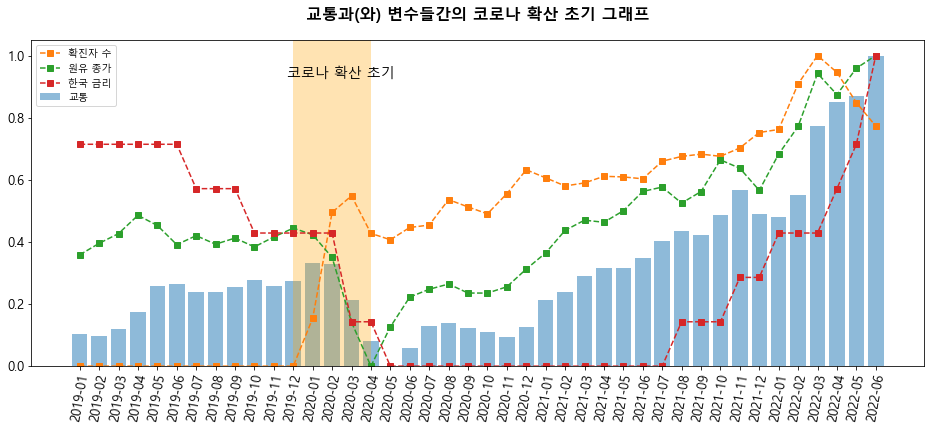

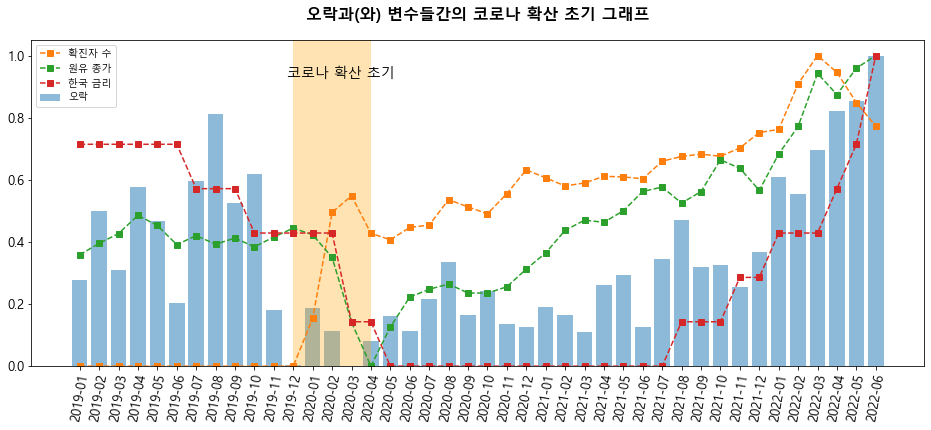

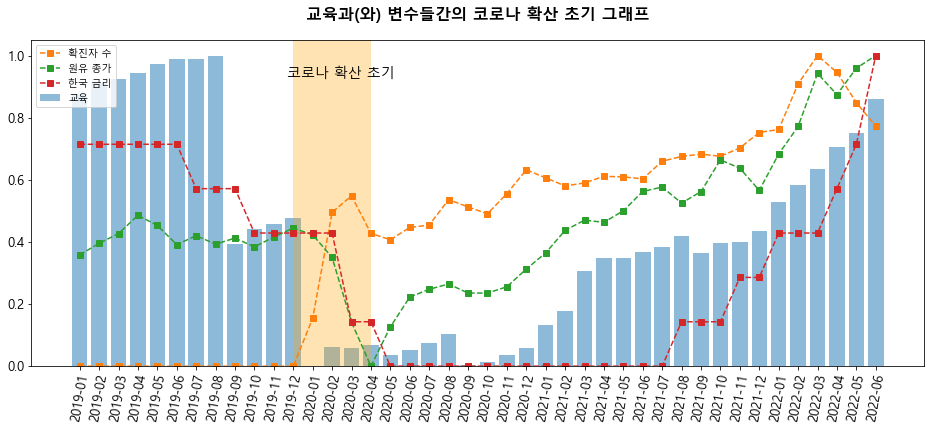

In [21]:
draw_scaled(df_total_01,'교통','코로나 확산 초기')
draw_scaled(df_total_01,'오락','코로나 확산 초기')
draw_scaled(df_total_01,'교육','코로나 확산 초기')

#### 그래프를 통해서 2019년 12월부터 코로나 확진자 수가 증가하기 시작하면서

#### 5개월간 원유 가격과 금리가 급격히 하락하는 것을 알 수 있습니다.

#### 이는 코로나 인한 전세계적인 경제침체의 영향으로 생각할 수 있으며

#### 교통과 오락, 교육의 경우 이에 영향을 받으면서 수요량 또한 감소하여 물가 상승이 급격히 낮아짐을 알 수 있습니다.

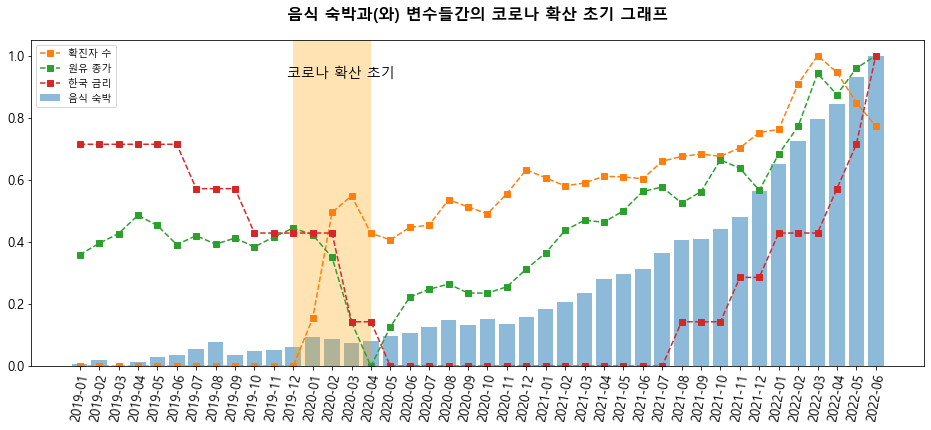

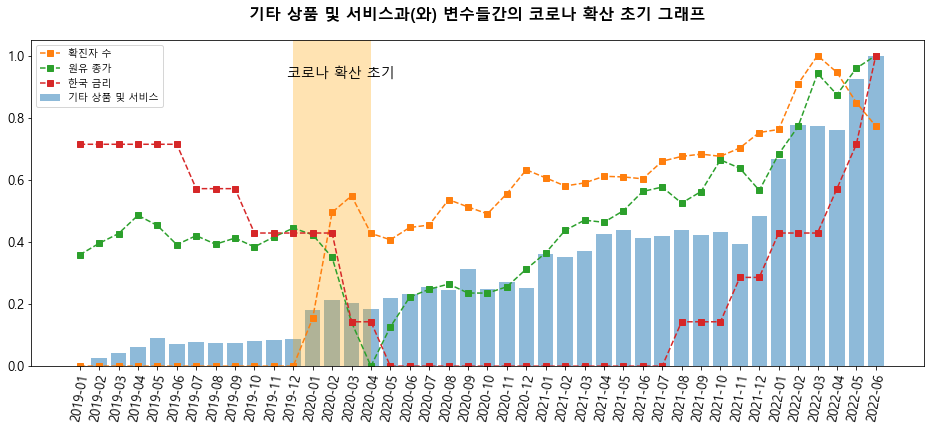

In [17]:
draw_scaled(df_total_01,'음식 숙박','코로나 확산 초기')
draw_scaled(df_total_01,'기타 상품 및 서비스','코로나 확산 초기')

#### 반면 음식 숙박, 기타 상품 및 서비스의 경우 그 영향력이 미비하거나 더 올라감을 알 수 있습니다.

#### 음식값이나 서비스와 같은 가격은 하방경직성이 강한 사례이기에 6개월 단기간의 변수들이 영향력이 약하기 때문입니다.

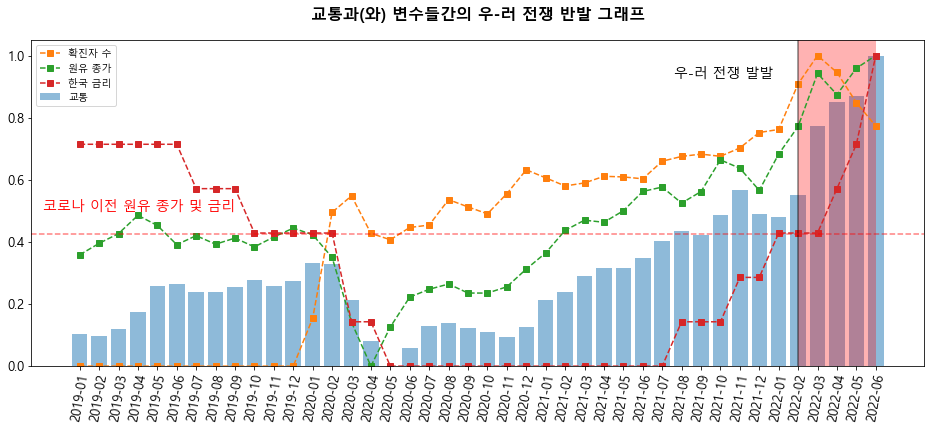

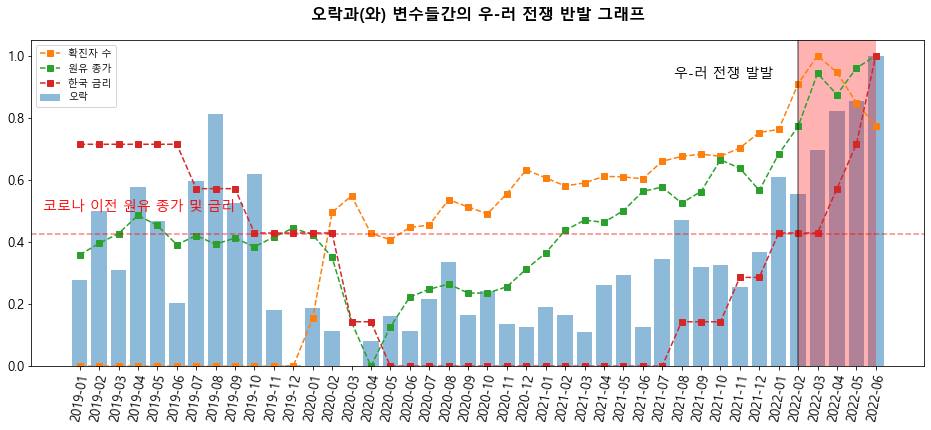

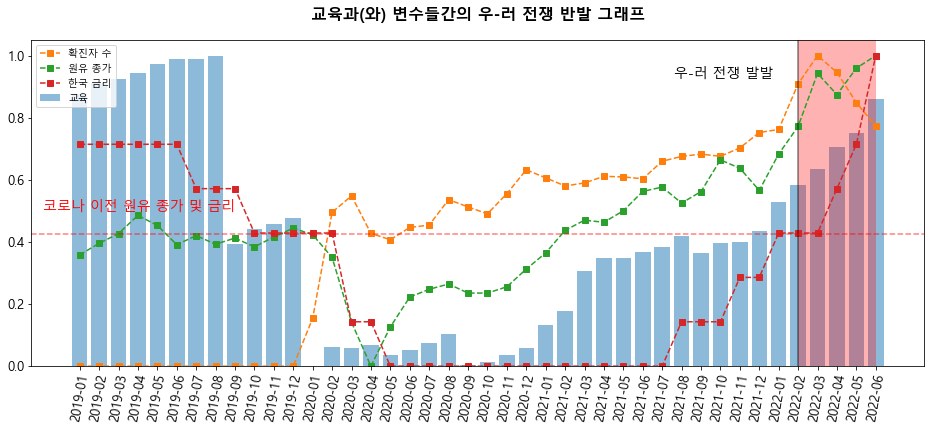

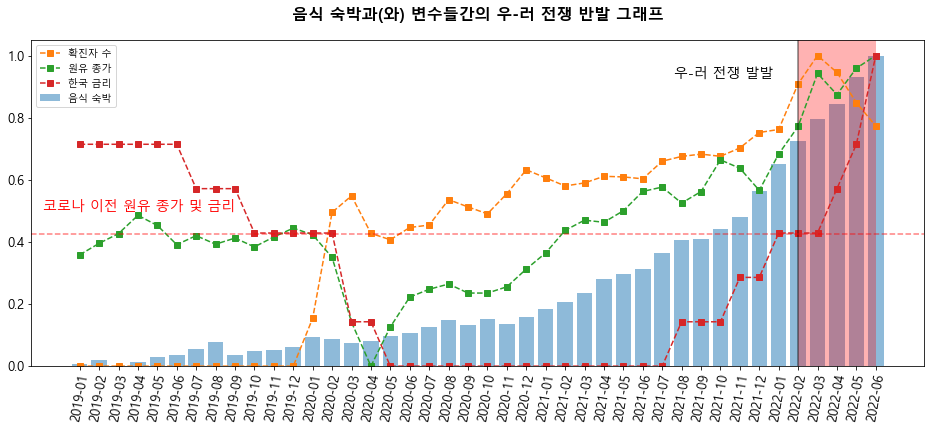

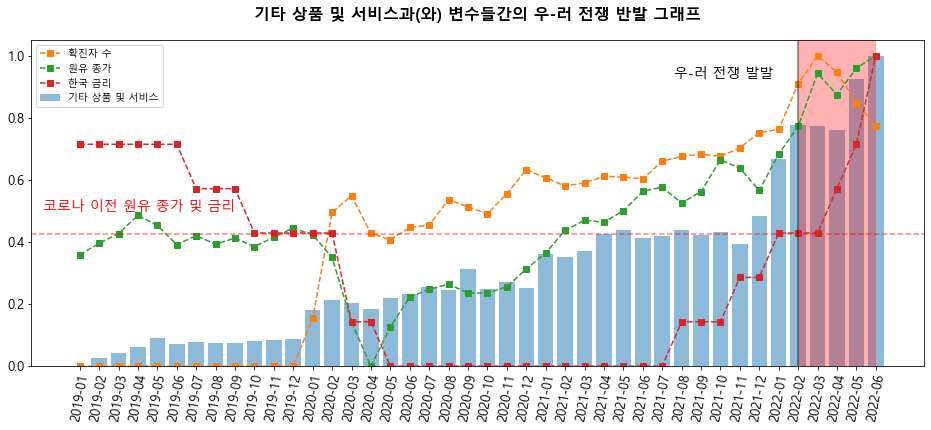

In [22]:
showgraph('우-러 전쟁 반발')

#### 이후 금리는 코로나 영향으로 2021년 7월까지 동결되었지만 원유 가격은 저점을 찍은 후 증가함을 알 수 있습니다.
#### 2021년 2월 이미 원유 종가는 코로나 이전보다 높아졌으며
#### 2022년 2월 우크라이나-러시아 전쟁이 반발하기 두달 전부터
#### 원유 종가가 가파르게  증가하고 있습니다.
#### 동시에 22년 1월부터 동결되었던 한국의 금리 수치가 코로나 이전으로 복귀하였고
#### 원유 종가의 가격이 코로나 이전보다 월등히 증가하면서 모든 종목에서 소비자 물가가 상승함을 알 수 있습니다.
#### 특히 유가 하락에는 영향이 미비했었던 음식 등의 물가가 유가 상승과 함께 빠르게 증가함을 보여
#### 유가하락과 달리 상승에는 크게 영향을 받는걸 알 수 있습니다.

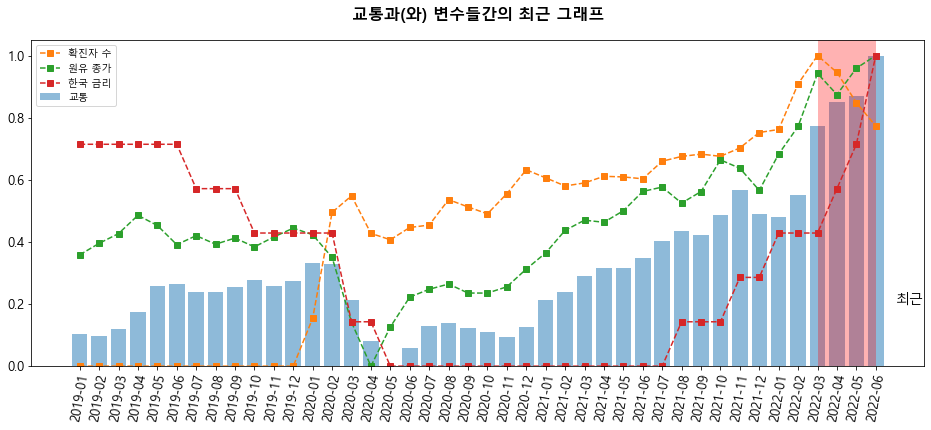

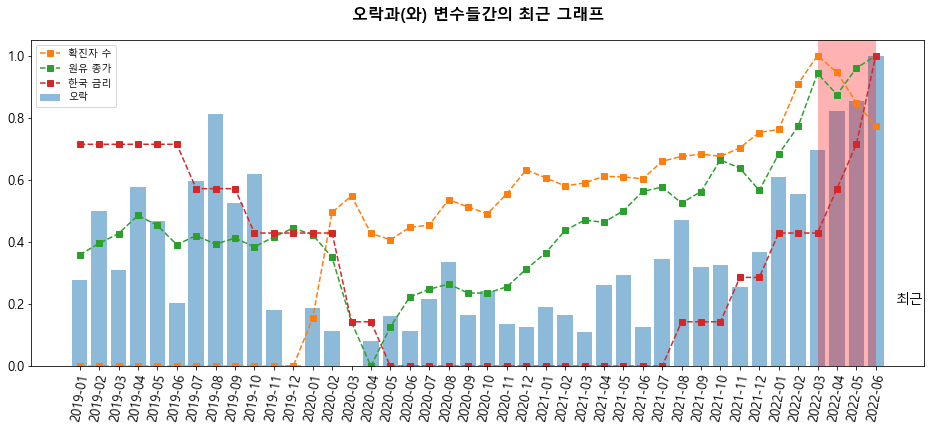

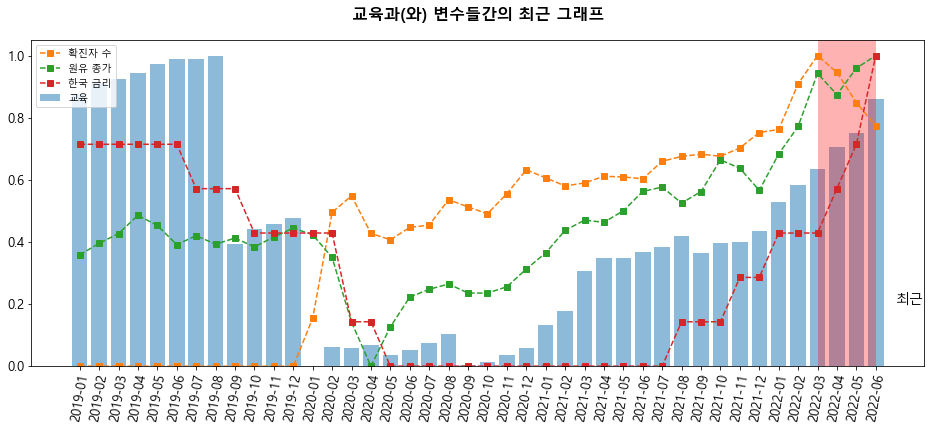

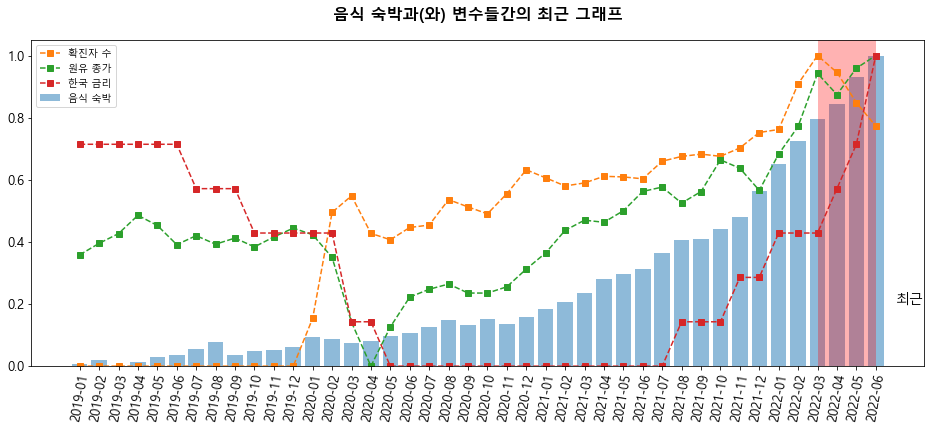

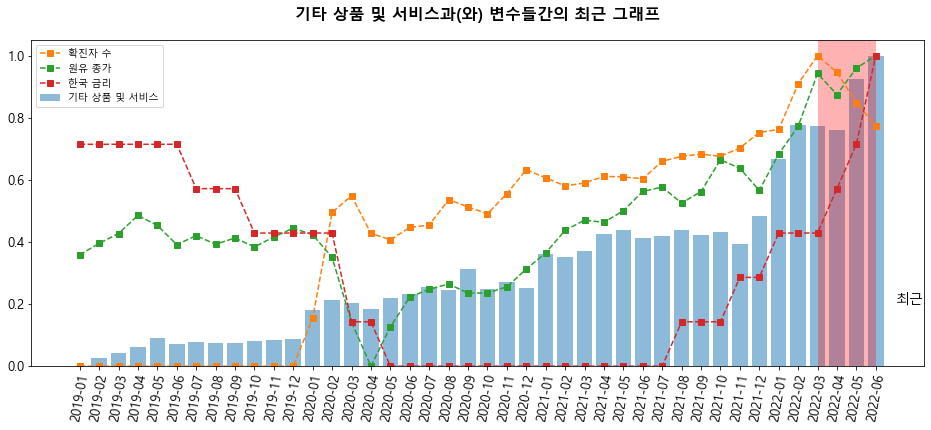

In [14]:
showgraph('최근')

#### 마지막으로 2022년 3월 이후 4개월 간 코로나 확진자 수 추세가 보면
#### 코로나 확진자 수 꺽였음에도 소비자 물가는 계속 상승함을 볼 수 있습니다.
#### 이를 통해 코로나 확산세 초기의 상황과 달리 현재의 소비자 물가에 영향을 미치는 요인은
#### 우크라이나 - 러시아 간의 전쟁으로 인한 유가 상승이  주가 되었고
#### 코로나 확산이란 요인의 영향력은 크게 감소했음을 알 수 있습니다.

## #최종결론
    - 지난 3년간 교통, 통신, 오락, 교육, 음식 및 숙박, 기타 상품 및 서비스의
      지출 목적별 소비자 물가 지수에서 최근까지 가장 영향력이 크게 끼치고 있는 요인은 원유 종가입니다.
      
    - 우크라이나 전쟁이 장기화 되고 있는 지금 유가 상승세와 함께 물가는 계속 상승할 거라 보입니다.
    
    - 코로나 초창기 상황을 보았을 때 우크라이나 전쟁이 종전을 하더라도
      우리들에게 가장 크게 와닿는 음식과 관련된 물가는 하락하기까지 오랜 기간이 걸릴 거라 예상됩니다.